## TASK 4.1: data selection

analysis_data_advocacy_vs_political.csv

In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
import re
from collections import Counter
import math

DATA_PATH = Path("../data")

df = pd.read_csv(DATA_PATH / "analysis_data_advocacy_vs_individuals.csv",
                 engine="python",
                 on_bad_lines="skip")

print("Initial rows:", len(df))
df.head()


Initial rows: 77230


,id,author_id,text,created_at,lang,referenced_tweets,public_metrics,Type,Lang,Stance
0,675827386416541696,518918764,"RT @WWFnoticias: HOY, el mundo marcó el princi...",2015-12-12T23:59:39.000Z,es,"[{'type': 'retweeted', 'id': '6757700921230663...","{'retweet_count': 111, 'reply_count': 0, 'like...",Advocacy actors,es,For
1,675825759852867585,518918764,RT @WWF_LAC: #COP21:Gobiernos fijan rumbo fren...,2015-12-12T23:53:12.000Z,es,"[{'type': 'retweeted', 'id': '6757525005956751...","{'retweet_count': 15, 'reply_count': 0, 'like_...",Advocacy actors,es,For
2,675825614193041409,518918764,RT @WWF_LAC: Negociaciones climáticas terminar...,2015-12-12T23:52:37.000Z,es,"[{'type': 'retweeted', 'id': '6757606436103864...","{'retweet_count': 9, 'reply_count': 0, 'like_c...",Advocacy actors,es,For
3,675691410872508417,518918764,"#WWF está preocupado, falta garantía para la a...",2015-12-12T14:59:20.000Z,es,NaN,"{'retweet_count': 3, 'reply_count': 0, 'like_c...",Advocacy actors,es,For
4,675690673132146688,518918764,El último texto #COP21 tiene señales de que go...,2015-12-12T14:56:24.000Z,es,NaN,"{'retweet_count': 3, 'reply_count': 0, 'like_c...",Advocacy actors,es,For


In [19]:
# 只保留英文
df = df[df["lang"] == "en"].copy()
print("Rows after English filtering:", len(df))
df.head()

Rows after English filtering: 50780


,id,author_id,text,created_at,lang,referenced_tweets,public_metrics,Type,Lang,Stance
34,674237085704978432,518918764,RT @World_Wildlife: WWF board member @LeoDiCap...,2015-12-08T14:40:22.000Z,en,"[{'type': 'retweeted', 'id': '6728306923850383...","{'retweet_count': 300, 'reply_count': 0, 'like...",Advocacy actors,es,For
35,674236886966263808,518918764,RT @WWF_DG: #COP21 Really ....we must keep bel...,2015-12-08T14:39:35.000Z,en,"[{'type': 'retweeted', 'id': '6741432894199480...","{'retweet_count': 48, 'reply_count': 0, 'like_...",Advocacy actors,es,For
38,674227147733647360,518918764,RT @OscarJGuevara: @WWFColombia today at #COP2...,2015-12-08T14:00:53.000Z,en,"[{'type': 'retweeted', 'id': '6741656560283238...","{'retweet_count': 5, 'reply_count': 0, 'like_c...",Advocacy actors,es,For
64,672776529135321089,518918764,#COP21 is your chance to #changeclimatechange ...,2015-12-04T13:56:38.000Z,en,NaN,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Advocacy actors,es,For
134,675827278295777280,314125926,RT @paris_climate: The #Paris agreement means ...,2015-12-12T23:59:14.000Z,en,"[{'type': 'retweeted', 'id': '6756402297395404...","{'retweet_count': 63, 'reply_count': 0, 'like_...",Advocacy actors,en,For


## TASK 4.2：Word Scoring

In [20]:
# 找出两个群体（Advocacy vs Political）最“独特”的词。
# 每个词按 group 的相对频率计算 log-odds
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words("english"))

def preprocess(text):
    if not isinstance(text, str):
        return []
    # lowercase
    text = text.lower()
    # remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # tokenize
    words = text.split()
    # remove stopwords + very short tokens
    words = [w for w in words if w not in stop and len(w) > 2]
    return words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuezhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# 为每条 tweet 获取 tokens
df["tokens"] = df["text"].apply(preprocess)
df.head()

,id,author_id,text,created_at,lang,referenced_tweets,public_metrics,Type,Lang,Stance,tokens
34,674237085704978432,518918764,RT @World_Wildlife: WWF board member @LeoDiCap...,2015-12-08T14:40:22.000Z,en,"[{'type': 'retweeted', 'id': '6728306923850383...","{'retweet_count': 300, 'reply_count': 0, 'like...",Advocacy actors,es,For,"[worldwildlife, wwf, board, member, leodicapri..."
35,674236886966263808,518918764,RT @WWF_DG: #COP21 Really ....we must keep bel...,2015-12-08T14:39:35.000Z,en,"[{'type': 'retweeted', 'id': '6741432894199480...","{'retweet_count': 48, 'reply_count': 0, 'like_...",Advocacy actors,es,For,"[wwfdg, cop21, really, must, keep, science, cl..."
38,674227147733647360,518918764,RT @OscarJGuevara: @WWFColombia today at #COP2...,2015-12-08T14:00:53.000Z,en,"[{'type': 'retweeted', 'id': '6741656560283238...","{'retweet_count': 5, 'reply_count': 0, 'like_c...",Advocacy actors,es,For,"[oscarjguevara, wwfcolombia, today, cop21, tal..."
64,672776529135321089,518918764,#COP21 is your chance to #changeclimatechange ...,2015-12-04T13:56:38.000Z,en,NaN,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Advocacy actors,es,For,"[cop21, chance, changeclimatechange, juanmansa..."
134,675827278295777280,314125926,RT @paris_climate: The #Paris agreement means ...,2015-12-12T23:59:14.000Z,en,"[{'type': 'retweeted', 'id': '6756402297395404...","{'retweet_count': 63, 'reply_count': 0, 'like_...",Advocacy actors,en,For,"[parisclimate, paris, agreement, means, transi..."


In [27]:
# 按 group 统计词频
adv_tokens = []
pri_tokens = []

for _, row in df.iterrows():
    if row["Type"] == "Advocacy actors":
        adv_tokens.extend(row["tokens"])
    elif row["Type"] == "Private individuals":
        pri_tokens.extend(row["tokens"])


In [28]:
adv_counts = Counter(adv_tokens)
pri_counts = Counter(pri_tokens)

total_adv = sum(adv_counts.values())
total_pri = sum(pri_counts.values())

total_adv, total_pri


(343988, 171774)

In [29]:
# 计算 log-odds scores
# 避免 log(0)，需要平滑
scores = {}

for word in set(list(adv_counts.keys()) + list(pri_counts.keys())):
    p_adv = (adv_counts[word] + 1) / (total_adv + 1)
    p_pri = (pri_counts[word] + 1) / (total_pri + 1)
    scores[word] = math.log(p_adv / p_pri)

In [30]:
# 找出 top-10 distinctive words

# Advocacy 特有（score 越大越偏 Advocacy）
top_adv = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]
top_adv


[('nuclear4climate', 4.885305626785416),
 ('faqs', 4.573433959862522),
 ('parís2015', 4.3360137221916295),
 ('agcop21', 3.6363091410855253),
 ('oceancop21', 3.5752732504991562),
 ('climatekic', 3.4487105271907272),
 ('article2', 3.432710185844286),
 ('ifnotusthenwho', 3.3486270686337445),
 ('dcdays', 3.2945598473634687),
 ('sgk', 3.2945598473634687)]

In [31]:
# Private individuals 特有（score 越小越偏 Private individuals）
top_pri = sorted(scores.items(), key=lambda x: x[1])[:10]
top_pri

[('bars', -6.508554731025872),
 ('opchempba', -6.394867772591492),
 ('10km3x2', -5.794290627025004),
 ('bustthemyth', -5.788174400007568),
 ('ocnuke', -5.769598014434632),
 ('freepresidentnasheed', -5.700605142947681),
 ('pjnet', -5.481915941982852),
 ('ccot', -5.44801439030717),
 ('opchemtrails', -5.421812017913146),
 ('climateengineering', -5.2052837057176555)]

## TASK 4.3: text scoring

In [32]:
# 为每个用户计算平均 score
author_scores = {}

for author_id, group in df.groupby("author_id"):
    words = []
    for tokens in group["tokens"]:
        words.extend(tokens)

    if len(words) == 0:
        continue

    word_scores = [scores[w] for w in words if w in scores]

    if len(word_scores) > 0:
        author_scores[author_id] = np.mean(word_scores)


In [33]:
# 转成 DataFrame
author_df = pd.DataFrame({
    "author_id": list(author_scores.keys()),
    "scale_score": list(author_scores.values())
})

# 加上类型，方便检查
author_df = author_df.merge(
    df[["author_id", "Type"]].drop_duplicates(),
    on="author_id",
    how="left"
)

author_df.head()
author_df.shape

(493, 3)

In [34]:
# 检查 scaling 是否“合理”

# Advocacy 端
author_df[author_df["Type"] == "Advocacy actors"].sample(5)

,author_id,scale_score,Type
445,76849994,0.222266,Advocacy actors
64,14995404,0.155082,Advocacy actors
141,2152150705,0.191222,Advocacy actors
174,2356648265,-0.109964,Advocacy actors
58,1475139648,0.138340,Advocacy actors


In [35]:
# Political 端
author_df[author_df["Type"] == "Private individuals"].sample(5)

,author_id,scale_score,Type
225,270437243,-0.599902,Private individuals
234,2779080692,-0.073078,Private individuals
362,428844272,-0.272221,Private individuals
46,14250027,-0.590753,Private individuals
383,481412450,0.012558,Private individuals


Advocacy actors 明显倾向正方向

这说明他们使用了更多：

campaign words

structured activism vocabulary

官方活动 hashtags

语言置信度高 → score 更接近 +0.2 ~ +0.3。

Private individuals 整体更偏负

这说明他们更常使用与官方组织不同的词，包括：

fringe hashtags

口语表达

个人观点性词汇

或者根本不用 campaign 词（相对 frequency 更低）导致 score 往负方向偏移。

但也看到 “小部分 private individuals 靠近 0”

这也是“正常且正确”的：

有些 private individuals 也转发或使用 campaign 词

他们可能参与了一些 activism

或者只转发新闻而不写普通个人语言

所以在 scaling 上更接近中间, 说明 scaling 不是一刀切，而是在捕捉真实语言差异。

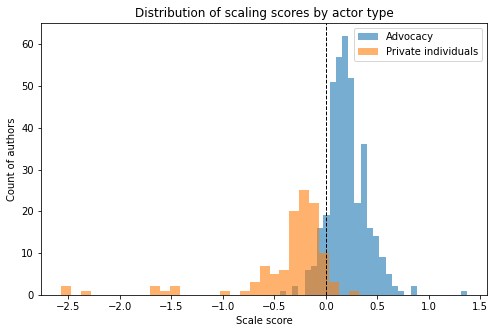

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(
    author_df[author_df["Type"] == "Advocacy actors"]["scale_score"],
    bins=30, alpha=0.6, label="Advocacy", color="tab:blue"
)
plt.hist(
    author_df[author_df["Type"] == "Private individuals"]["scale_score"],
    bins=30, alpha=0.6, label="Private individuals", color="tab:orange"
)

plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Scale score")
plt.ylabel("Count of authors")
plt.title("Distribution of scaling scores by actor type")
plt.legend()
plt.show()
